## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Student name:Myra Kadenge
Student pace: full time
Scheduled project review date/time:
Instructor name:
Blog post URL:


# MICROSOFT NEW STUDIO PROJECT ANALYSIS

# Overview

Microsoft is a multinational technological company 
As a private company and knowing that they want to open a new studio, their maon concern should not only be generating revenue but profits. This thus poses a challenge for the company which is to figure out how to open a profitable studio and explore the films that are currently doing the best, moreover finding a unique set of films that could give them a unique identity. The most essential thing to do would be to look at the most profitable movies.


# Data Analysis

In [1]:
#Start by importing the standard packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [2]:
#First load all the data sets to understand the different elements in each and how they may interract with each 
#other to help in deciding which ones to merge as well
df_bom_movies = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df_rt = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter = '\t')
df_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df4 = pd.read_csv('zippedData/tmdb.movies.csv.gz')


In [3]:
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()


# First dataset bom movies

In [4]:
#Looking at the first data set bom.movies
df_bom_movies
df_bom_movies.head(10)
#This dataset seems to focus more on revenue from the movies which could be of use when calculating the profits. 
#the year as well could help know what movies were trending at those times
#The studios could aslo help in identifying which have good marketing stratetigies and we can see which are most 
#preferred.

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [5]:
#get a summary of the data to see if there could be any missing values
df_bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
#studio, domestic gross and foreign gross seem to have missing values
df_bom_movies.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [7]:
df_bom_movies.duplicated().value_counts()#to check for any duplicates
#we have no duplicates in this dataset

False    3387
dtype: int64

In [10]:
#I will convert the foreign gross data to numeric data
# Clean the 'foreign_gross' column by removing commas
df_bom_movies['foreign_gross'] = df_bom_movies['foreign_gross'].astype(str)
df_bom_movies['foreign_gross'] = df_bom_movies['foreign_gross'].str.replace(',', '')

# Convert the 'foreign_gross' column to numeric
df_bom_movies['foreign_gross'] = pd.to_numeric(df_bom_movies['foreign_gross'], errors='coerce')

# Display non-numeric values (if any)
non_numeric_values = df_bom_movies['foreign_gross'][df_bom_movies['foreign_gross'].isna()]
print("Non-numeric values in 'foreign_gross':")
print(non_numeric_values)

# Display the first few rows of the DataFrame to verify the conversion
print(df_bom_movies.head())

Non-numeric values in 'foreign_gross':
222    NaN
254    NaN
267    NaN
269    NaN
280    NaN
        ..
3382   NaN
3383   NaN
3384   NaN
3385   NaN
3386   NaN
Name: foreign_gross, Length: 1350, dtype: float64
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

   foreign_gross  year  
0    652000000.0  2010  
1    691300000.0  2010  
2    664300000.0  2010  
3    535700000.0  2010  
4    513900000.0  2010  


In [11]:
#the code below will give the % of missing values in the columns to guide my decision
df_bom_movies.isnull().sum()*100/len(df_bom_movies)

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [12]:
#these are not huge % hence i will drop the rows with missing values
df_bom_movies.dropna(axis = 0,inplace = True)
df_bom_movies.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [14]:
df_bom_movies.info()
#I have no missing values or duplicates in this dataset and i have converted the required columns to numeric datatypes.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB



# Second dataset is the rt.movies

In [15]:
df_rt
df_rt.info()
#This dataset seems to give me detailed information about the movies
#I aim to use the genre column as this will guide miccrosoft on which genre to focus on based on the most popular genre

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [16]:
#i will drop the columns i don't need and remain with the ones i need for merging with the other datasets
df_rt.drop(['synopsis','director','writer','theater_date','dvd_date','currency','box_office',],axis = 1,inplace = True)
df_rt.info()
#The genre may be significant data in guiding microsoft on which genre to specialize in 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1560 non-null   int64 
 1   rating   1557 non-null   object
 2   genre    1552 non-null   object
 3   runtime  1530 non-null   object
 4   studio   494 non-null    object
dtypes: int64(1), object(4)
memory usage: 61.1+ KB


In [17]:
#Then check for duplicates in my remaining columns
df_rt.duplicated().value_counts()
#ther are no duplicates

False    1560
dtype: int64

In [19]:
#checking the percentage to make decision
df_rt.isnull().sum()*100/len(df_rt)

id          0.000000
rating      0.192308
genre       0.512821
runtime     1.923077
studio     68.333333
dtype: float64

In [40]:
#I am going to first work on the ratings column where i'll replace the missing data with a placeholder in this case NA
df_rt['rating'].fillna('NA', inplace = True)

#since it is a small number of missing data i will drop the rows with missing data
df_rt.dropna(subset=['genre'], axis=0, inplace=True)

#Finally for Runtime Column
# Remove units of measurement from runtime column                                 
df_rt['runtime'] = [float(str(x).replace('minutes', '')) for x in df_rt['runtime']]

# Convert runtime column to float
df_rt['runtime'] = pd.to_numeric(df_rt['runtime'], errors='coerce')

# Inpute missing values in runtime column with median value
median_runtime = df_rt['runtime'].median()
df_rt['runtime'].fillna(median_runtime, inplace=True)

df_rt.isnull().sum()*100/len(df_rt)

id          0.000000
rating      0.000000
genre       0.000000
runtime     0.000000
studio     68.170103
dtype: float64

In [41]:
df_rt

,id,rating,genre,runtime,studio
0,1,R,Action and Adventure|Classics|Drama,104.0,NaN
1,3,R,Drama|Science Fiction and Fantasy,108.0,Entertainment One
2,5,R,Drama|Musical and Performing Arts,116.0,NaN
3,6,R,Drama|Mystery and Suspense,128.0,NaN
4,7,NR,Drama|Romance,200.0,NaN
...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,106.0,New Line Cinema
1556,1997,PG,Comedy|Science Fiction and Fantasy,88.0,Paramount Vantage
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,111.0,NaN
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,101.0,NaN


# Third dataset the movies budget

In [23]:
df_budget
#As compared to the first dataset it seems worlwide gross could be of more help in getting the profits

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [24]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [25]:
#does not seem to have null values
#what about duplicates?

In [26]:
df_budget.duplicated().value_counts()

False    5782
dtype: int64

In [27]:
#I am changing them to strings for consistency
df_budget['production_budget'] = df_budget['production_budget'].astype(str)
df_budget['domestic_gross'] = df_budget['domestic_gross'].astype(str)
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].astype(str)
  
for r in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    # Removes $ symbol and ,
    df_budget[r] = df_budget[r].str.replace('$', '').str.replace(',', '') 
    df_budget[r] = df_budget[r].astype(float) # Converts from object (str) to float
    # Divides by 100,000,000 to make it easier for the visualization
    df_budget[r] = (df_budget[r]).astype('int64') # Converts from float to int64
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


# Merging the Datasets to see what we have

In [42]:
merged_data_one = pd.merge(df_bom_movies, df_rt, on='studio')
merged_data_one.head()
 

,title,studio,domestic_gross,foreign_gross,year,id,rating,genre,runtime
0,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,611,R,Drama|Mystery and Suspense,137.0
1,Inception,WB,292600000.0,535700000.0,2010,611,R,Drama|Mystery and Suspense,137.0
2,Clash of the Titans (2010),WB,163200000.0,330000000.0,2010,611,R,Drama|Mystery and Suspense,137.0
3,Due Date,WB,100500000.0,111200000.0,2010,611,R,Drama|Mystery and Suspense,137.0
4,Yogi Bear,WB,100200000.0,101300000.0,2010,611,R,Drama|Mystery and Suspense,137.0


In [29]:
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [43]:
#i will replace the name movie woth title to much with the merged dataset
df_budget.rename(columns={'movie': 'title'},inplace = 'True')
df_budget

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [44]:
final_dataset = pd.merge(merged_data_one,df_budget, on = 'title')
final_dataset

,title,studio,domestic_gross_x,foreign_gross,year,id_x,rating,genre,runtime,id_y,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Inception,WB,292600000.0,535700000.0,2010,611,R,Drama|Mystery and Suspense,137.0,38,"Jul 16, 2010",160000000,292576195,835524642
1,Due Date,WB,100500000.0,111200000.0,2010,611,R,Drama|Mystery and Suspense,137.0,84,"Nov 5, 2010",65000000,100539043,211739043
2,Yogi Bear,WB,100200000.0,101300000.0,2010,611,R,Drama|Mystery and Suspense,137.0,62,"Dec 17, 2010",80000000,100246011,204774690
3,The Book of Eli,WB,94800000.0,62300000.0,2010,611,R,Drama|Mystery and Suspense,137.0,64,"Jan 15, 2010",80000000,94835059,158750817
4,The Town,WB,92200000.0,61800000.0,2010,611,R,Drama|Mystery and Suspense,137.0,92,"Sep 17, 2010",37000000,92186262,152566881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,The Witch,A24,25100000.0,15300000.0,2016,1399,R,Drama|Horror,91.0,94,"Feb 19, 2016",3500000,25138705,40454520
246,American Honey,A24,663000.0,1200000.0,2016,1399,R,Drama|Horror,91.0,15,"Sep 30, 2016",3500000,663247,2611750
247,Lady Bird,A24,49000000.0,30000000.0,2017,1399,R,Drama|Horror,91.0,53,"Nov 3, 2017",10000000,48958273,78610769
248,The Disaster Artist,A24,21100000.0,8700000.0,2017,1399,R,Drama|Horror,91.0,100,"Dec 1, 2017",10000000,21120616,28717667


In [32]:
#Now lets drop one column for domestic_gross since they are two
final_dataset.drop(['domestic_gross_y'],axis = 1,inplace = True) 
final_dataset

,title,studio,domestic_gross_x,foreign_gross,year,id_x,rating,genre,runtime,id_y,release_date,production_budget,worldwide_gross
0,Inception,WB,292600000.0,535700000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes,38,"Jul 16, 2010",160000000,835524642
1,Due Date,WB,100500000.0,111200000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes,84,"Nov 5, 2010",65000000,211739043
2,Yogi Bear,WB,100200000.0,101300000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes,62,"Dec 17, 2010",80000000,204774690
3,The Book of Eli,WB,94800000.0,62300000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes,64,"Jan 15, 2010",80000000,158750817
4,The Town,WB,92200000.0,61800000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes,92,"Sep 17, 2010",37000000,152566881
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,The Witch,A24,25100000.0,15300000.0,2016,1399,R,Drama|Horror,91 minutes,94,"Feb 19, 2016",3500000,40454520
246,American Honey,A24,663000.0,1200000.0,2016,1399,R,Drama|Horror,91 minutes,15,"Sep 30, 2016",3500000,2611750
247,Lady Bird,A24,49000000.0,30000000.0,2017,1399,R,Drama|Horror,91 minutes,53,"Nov 3, 2017",10000000,78610769
248,The Disaster Artist,A24,21100000.0,8700000.0,2017,1399,R,Drama|Horror,91 minutes,100,"Dec 1, 2017",10000000,28717667


In [45]:
final_dataset

,title,studio,domestic_gross_x,foreign_gross,year,id_x,rating,genre,runtime,id_y,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Inception,WB,292600000.0,535700000.0,2010,611,R,Drama|Mystery and Suspense,137.0,38,"Jul 16, 2010",160000000,292576195,835524642
1,Due Date,WB,100500000.0,111200000.0,2010,611,R,Drama|Mystery and Suspense,137.0,84,"Nov 5, 2010",65000000,100539043,211739043
2,Yogi Bear,WB,100200000.0,101300000.0,2010,611,R,Drama|Mystery and Suspense,137.0,62,"Dec 17, 2010",80000000,100246011,204774690
3,The Book of Eli,WB,94800000.0,62300000.0,2010,611,R,Drama|Mystery and Suspense,137.0,64,"Jan 15, 2010",80000000,94835059,158750817
4,The Town,WB,92200000.0,61800000.0,2010,611,R,Drama|Mystery and Suspense,137.0,92,"Sep 17, 2010",37000000,92186262,152566881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,The Witch,A24,25100000.0,15300000.0,2016,1399,R,Drama|Horror,91.0,94,"Feb 19, 2016",3500000,25138705,40454520
246,American Honey,A24,663000.0,1200000.0,2016,1399,R,Drama|Horror,91.0,15,"Sep 30, 2016",3500000,663247,2611750
247,Lady Bird,A24,49000000.0,30000000.0,2017,1399,R,Drama|Horror,91.0,53,"Nov 3, 2017",10000000,48958273,78610769
248,The Disaster Artist,A24,21100000.0,8700000.0,2017,1399,R,Drama|Horror,91.0,100,"Dec 1, 2017",10000000,21120616,28717667


In [46]:
final_dataset.duplicated().value_counts()#to double check for any duplicates

False    250
dtype: int64

In [47]:
final_dataset.isna().sum()

title                0
studio               0
domestic_gross_x     0
foreign_gross        0
year                 0
id_x                 0
rating               0
genre                0
runtime              0
id_y                 0
release_date         0
production_budget    0
domestic_gross_y     0
worldwide_gross      0
dtype: int64

In [48]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              250 non-null    object 
 1   studio             250 non-null    object 
 2   domestic_gross_x   250 non-null    float64
 3   foreign_gross      250 non-null    float64
 4   year               250 non-null    int64  
 5   id_x               250 non-null    int64  
 6   rating             250 non-null    object 
 7   genre              250 non-null    object 
 8   runtime            250 non-null    float64
 9   id_y               250 non-null    int64  
 10  release_date       250 non-null    object 
 11  production_budget  250 non-null    int64  
 12  domestic_gross_y   250 non-null    int64  
 13  worldwide_gross    250 non-null    int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 29.3+ KB


# Which is the most popular Genre?

In [49]:
genre_counts=final_dataset['genre'].value_counts()
genre_counts

Drama|Mystery and Suspense                                              210
Comedy|Drama                                                             17
Drama|Horror                                                             11
Action and Adventure|Mystery and Suspense                                 2
Art House and International|Comedy|Drama|Musical and Performing Arts      2
Drama|Horror|Mystery and Suspense                                         2
Drama                                                                     2
Drama|Romance                                                             2
Action and Adventure|Drama                                                2
Name: genre, dtype: int64

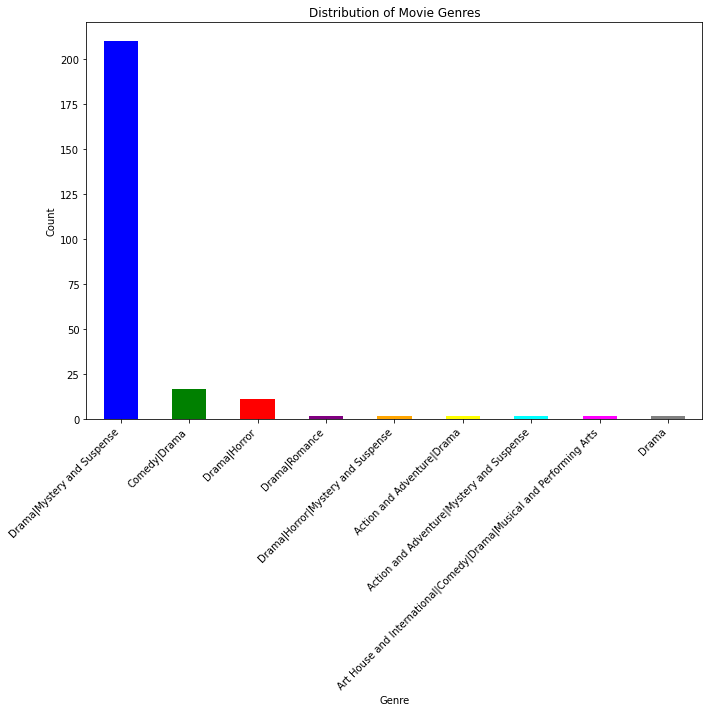

In [35]:
#Lets visualize it using a bar graph since

colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'gray', 'brown']

# Plot the bar graph with different colors
plt.figure(figsize=(10, 10))
genre_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Which is the most profitable studio?


In [53]:
#To calculate my profit
final_dataset['profit']=final_dataset['worldwide_gross']-final_dataset['production_budget']

# Afterwards, group the movies by their respective studios and sum up the profits
studio_profit = final_dataset.groupby('studio')['profit'].sum()

# Finally, i sort the data by profit in descending order
studio_profit = studio_profit.sort_values(ascending=False)

# Print the resulting DataFrame
print(studio_profit)

studio
Fox    19054087780
WB     14038224007
MGM     1354914904
A24      249329992
IFC      156825818
Name: profit, dtype: int64


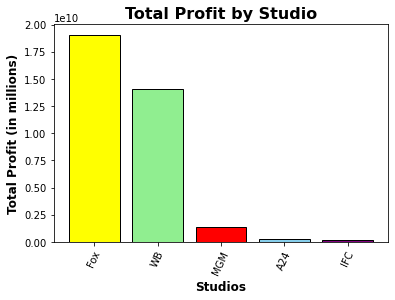

In [54]:
# Plot a bar chart of the studio profits
colour=['yellow','lightgreen','red','skyblue','purple']

plt.bar(studio_profit.index, studio_profit.values,color=colour, edgecolor='black')

# Add labels and title to the chart, and customize their appearance
plt.xlabel('Studios', fontsize=12, fontweight='bold')
plt.ylabel('Total Profit (in millions)', fontsize=12, fontweight='bold')
plt.title('Total Profit by Studio', fontsize=16, fontweight='bold')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=65)

# Display the chart
plt.show()                      


In [55]:
final_dataset

,title,studio,domestic_gross_x,foreign_gross,year,id_x,rating,genre,runtime,id_y,release_date,production_budget,domestic_gross_y,worldwide_gross,profit
0,Inception,WB,292600000.0,535700000.0,2010,611,R,Drama|Mystery and Suspense,137.0,38,"Jul 16, 2010",160000000,292576195,835524642,675524642
1,Due Date,WB,100500000.0,111200000.0,2010,611,R,Drama|Mystery and Suspense,137.0,84,"Nov 5, 2010",65000000,100539043,211739043,146739043
2,Yogi Bear,WB,100200000.0,101300000.0,2010,611,R,Drama|Mystery and Suspense,137.0,62,"Dec 17, 2010",80000000,100246011,204774690,124774690
3,The Book of Eli,WB,94800000.0,62300000.0,2010,611,R,Drama|Mystery and Suspense,137.0,64,"Jan 15, 2010",80000000,94835059,158750817,78750817
4,The Town,WB,92200000.0,61800000.0,2010,611,R,Drama|Mystery and Suspense,137.0,92,"Sep 17, 2010",37000000,92186262,152566881,115566881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,The Witch,A24,25100000.0,15300000.0,2016,1399,R,Drama|Horror,91.0,94,"Feb 19, 2016",3500000,25138705,40454520,36954520
246,American Honey,A24,663000.0,1200000.0,2016,1399,R,Drama|Horror,91.0,15,"Sep 30, 2016",3500000,663247,2611750,-888250
247,Lady Bird,A24,49000000.0,30000000.0,2017,1399,R,Drama|Horror,91.0,53,"Nov 3, 2017",10000000,48958273,78610769,68610769
248,The Disaster Artist,A24,21100000.0,8700000.0,2017,1399,R,Drama|Horror,91.0,100,"Dec 1, 2017",10000000,21120616,28717667,18717667


# How does the runtime affect the profits?

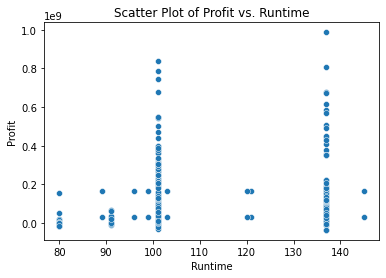

In [56]:
sns.scatterplot(x='runtime', y='profit', data=final_dataset)
plt.xlabel('Runtime')
plt.ylabel('Profit')
plt.title('Scatter Plot of Profit vs. Runtime')
plt.show()

In [ ]:
#the scatter plot does not show any correlation between run time and profit meeaning microsoft does not need to 
#focus on the runtime of the mobies they choose to create.